In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('./data/tr_eikon_eod_data.csv', index_col = 0, parse_dates = True)

In [3]:
# get raw data for five stocks
selected = ['AAPL.O','MSFT.O','INTC.O','AMZN.O','GS.N']
entire_data = {}
training_data = {}
testing_data = {}
orders = {}

In [4]:
data = df[['AAPL.O','MSFT.O','INTC.O','AMZN.O','GS.N']].dropna()

In [8]:
# Split into training data and testing data
for stock in selected:
    length = int(len(data[stock]) * 0.8)
    entire_data[stock] = data[stock]
    training_data[stock] = pd.DataFrame(data[stock].iloc[:length])
    testing_data[stock] = pd.DataFrame(data[stock].iloc[length:])
    testing_data[stock]['Returns'] = np.log(testing_data[stock] / testing_data[stock].shift(1))

In [9]:
# Generate the optimal orders
order_AAPL = auto_arima(training_data['AAPL.O'], seasonal=False, trace=True).order
order_MSFT = auto_arima(training_data['MSFT.O'], seasonal=False, trace=True).order
order_INTC = auto_arima(training_data['INTC.O'], seasonal=False, trace=True).order
order_AMZN = auto_arima(training_data['AMZN.O'], seasonal=False, trace=True).order
order_GS = auto_arima(training_data['GS.N'], seasonal=False, trace=True).order

In [28]:
orders = {'AAPL.O': (0, 1, 0),
          'MSFT.O': (1, 1, 0),
          'INTC.O': (1, 1, 0),
          'AMZN.O': (0, 1, 0),
          'GS.N': (1, 1, 1)}

In [31]:
def get_pre(raw, order):
    
    def arima_forecast(traindata, obs):
        model = ARIMA(traindata, order=order).fit()
        pre_y = model.forecast()[0]
        # Update traindata with the new observation since we already know this value now after EOD, 
        # and hence this can be used without any bias / leakage to predict the next day's value
        traindata.append(obs)
        return pre_y
    
    # Split data into training data and testing data
    values = raw.values
    size = int(len(values) * 0.8)
    train = values[:size]
    test = values[size:len(values)]
    
    trainl = train.tolist()
    predictions = []
    for obs in test:
        pre_y = arima_forecast(trainl, obs)
        predictions.append(pre_y)
    
    return predictions

In [32]:
# Generate predicted prices of five stocks
for stock in selected:
    order = orders[stock]
    predictions = get_pre(entire_data[stock], order)
    testing_data[stock][stock + '_pred'] = predictions

In [ ]:
#AAPL.O

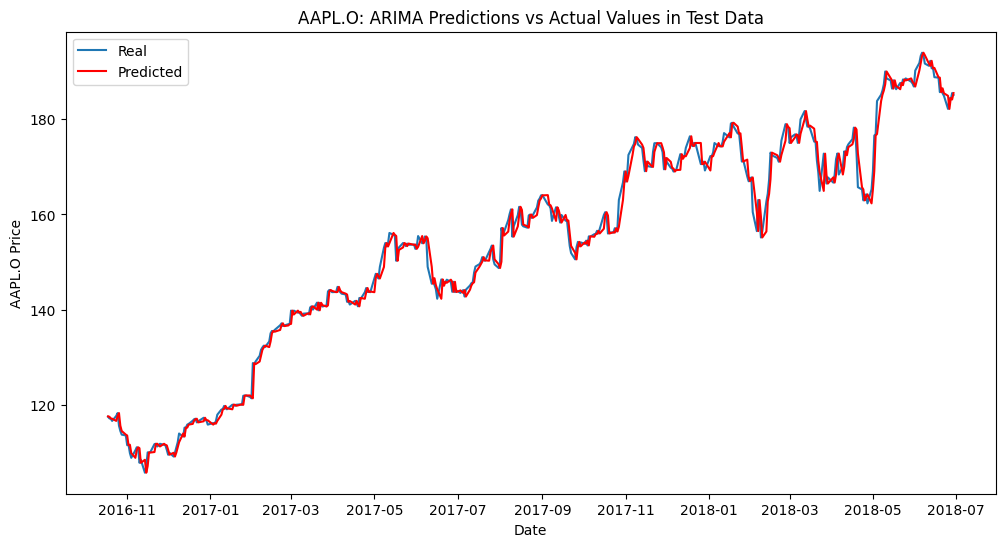

In [ ]:
# Compare the testing data with predictions
testL = testing_data['AAPL.O']['AAPL.O']
sizeL = len(testL)
test_pred = testing_data['AAPL.O']['AAPL.O_pred']
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(testL, label='Real')
plt.plot(testL.index, test_pred, color='red', label='Predicted')
plt.title('AAPL.O: ARIMA Predictions vs Actual Values in Test Data')
plt.xlabel('Date')
plt.ylabel('AAPL.O Price')
plt.legend()
plt.show()

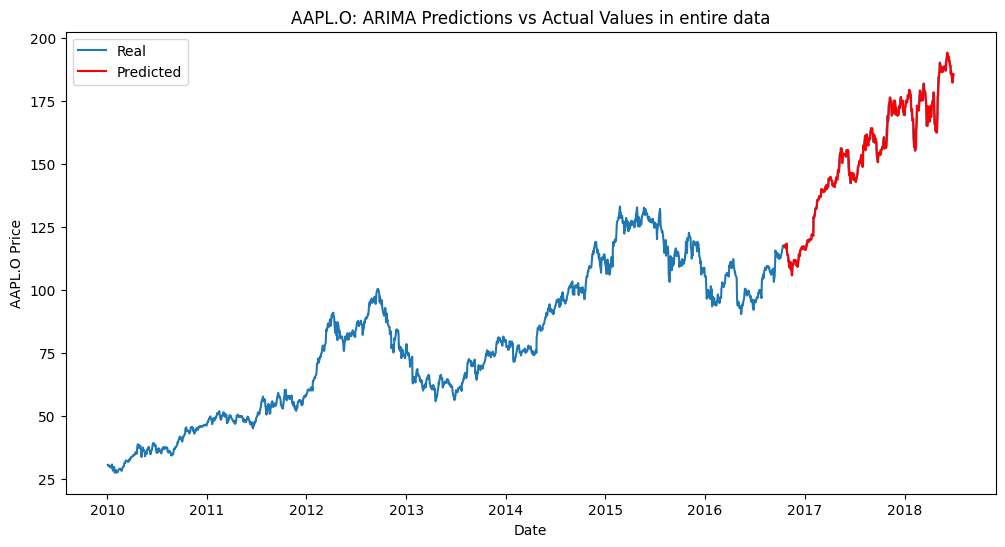

In [ ]:
# Compare AAPL.O entire prices with predictions
test_pred = testing_data['AAPL.O']['AAPL.O_pred']
sizeT = len(test_pred)
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data['AAPL.O'], label='Real')
plt.plot(data['AAPL.O'].iloc[-sizeT:,].index, test_pred, color='red', label='Predicted')
plt.title('AAPL.O: ARIMA Predictions vs Actual Values in entire data')
plt.xlabel('Date')
plt.ylabel('AAPL.O Price')
plt.legend()
plt.show()

In [ ]:
#MSFT.O

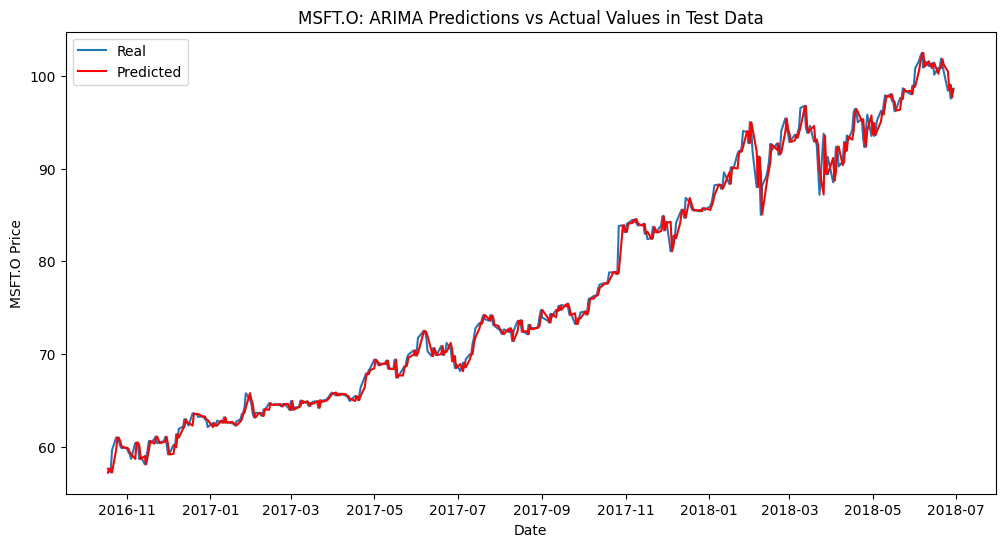

In [ ]:
# Compare the test data with predictions
testM = testing_data['MSFT.O']['MSFT.O']
sizeM = len(testM)
pre_MSFT = testing_data['MSFT.O']['MSFT.O_pred']
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(testM, label='Real')
plt.plot(testM.index, pre_MSFT, color='red', label='Predicted')
plt.title('MSFT.O: ARIMA Predictions vs Actual Values in Test Data')
plt.xlabel('Date')
plt.ylabel('MSFT.O Price')
plt.legend()
plt.show()

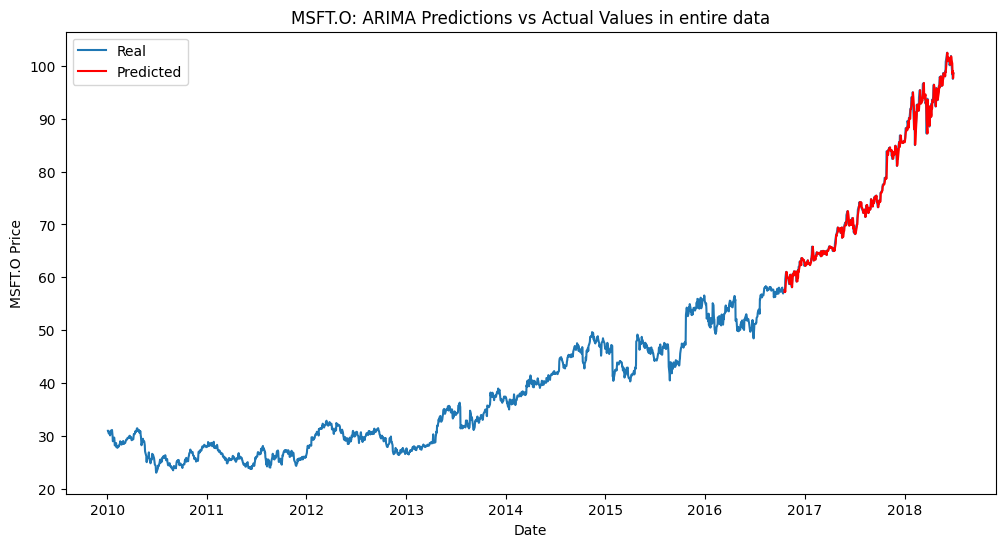

In [ ]:
# Compare MSFT.O entire prices with predictions
test_pred = testing_data['AAPL.O']['AAPL.O_pred']
sizeM = len(test_pred)
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data['MSFT.O'], label='Real')
plt.plot(data['MSFT.O'].iloc[-sizeM:,].index, pre_MSFT, color='red', label='Predicted')
plt.title('MSFT.O: ARIMA Predictions vs Actual Values in entire data')
plt.xlabel('Date')
plt.ylabel('MSFT.O Price')
plt.legend()
plt.show()

In [ ]:
#INTC.O

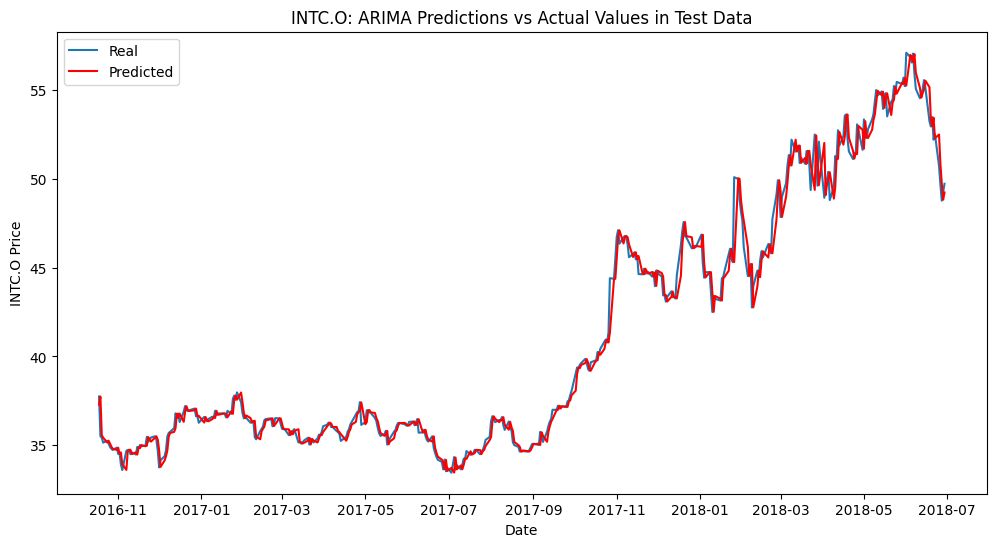

In [ ]:
# Compare the test data with predictions
testT = testing_data['INTC.O']['INTC.O']
sizeM = len(testM)
pre_INTC = testing_data['INTC.O']['INTC.O_pred']
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(testT, label='Real')
plt.plot(testT.index, pre_INTC, color='red', label='Predicted')
plt.title('INTC.O: ARIMA Predictions vs Actual Values in Test Data')
plt.xlabel('Date')
plt.ylabel('INTC.O Price')
plt.legend()
plt.show()

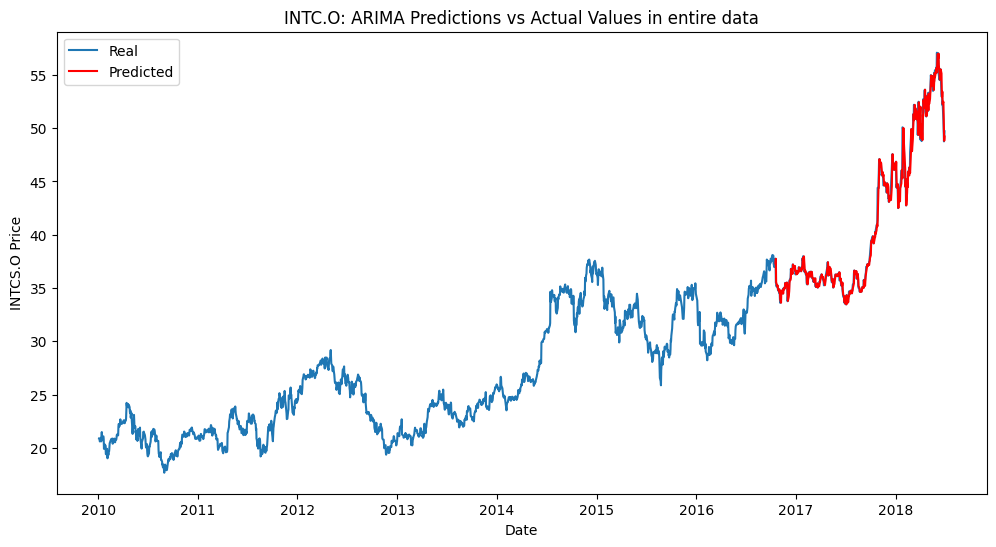

In [ ]:
# Compare INTC.O entire prices with predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data['INTC.O'], label='Real')
plt.plot(data['INTC.O'].iloc[-sizeT:,].index, pre_INTC, color='red', label='Predicted')
plt.title('INTC.O: ARIMA Predictions vs Actual Values in entire data')
plt.xlabel('Date')
plt.ylabel('INTCS.O Price')
plt.legend()
plt.show()

In [ ]:
#AMZN.O

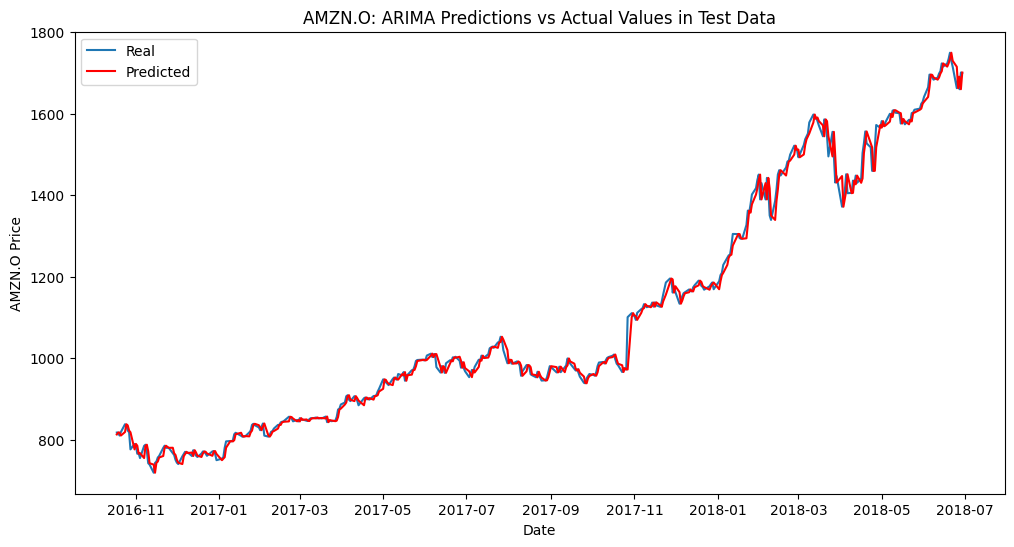

In [ ]:
# Compare the test data with predictions
testT = testing_data['AMZN.O']['AMZN.O']
sizeA = len(testM)
pre_AMZN = testing_data['AMZN.O']['AMZN.O_pred']
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(testT, label='Real')
plt.plot(testT.index, pre_AMZN, color='red', label='Predicted')
plt.title('AMZN.O: ARIMA Predictions vs Actual Values in Test Data')
plt.xlabel('Date')
plt.ylabel('AMZN.O Price')
plt.legend()
plt.show()

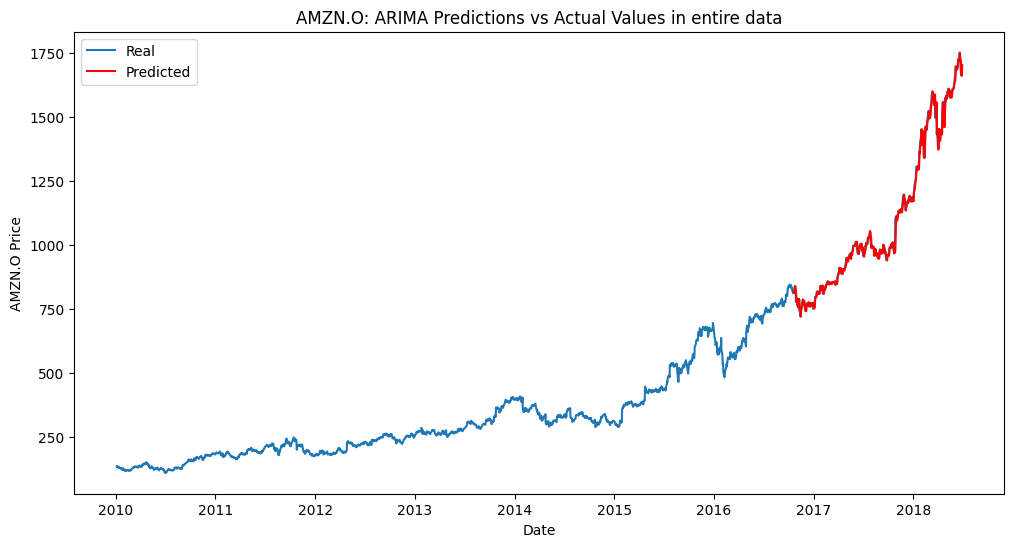

In [ ]:
# Compare AMZN.O entire prices with predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data['AMZN.O'], label='Real')
plt.plot(data['AMZN.O'].iloc[-sizeA:,].index, pre_AMZN, color='red', label='Predicted')
plt.title('AMZN.O: ARIMA Predictions vs Actual Values in entire data')
plt.xlabel('Date')
plt.ylabel('AMZN.O Price')
plt.legend()
plt.show()

In [ ]:
#GS.N

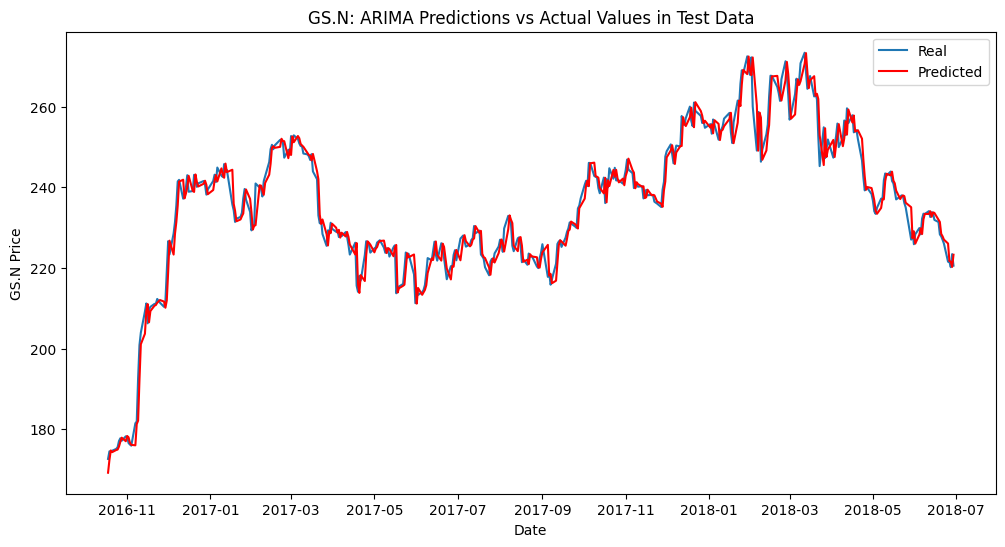

In [ ]:
# Compare the test data with predictions
testT = testing_data['GS.N']['GS.N']
sizeG = len(testM)
pre_GS = testing_data['GS.N']['GS.N_pred']
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(testT, label='Real')
plt.plot(testT.index, pre_GS, color='red', label='Predicted')
plt.title('GS.N: ARIMA Predictions vs Actual Values in Test Data')
plt.xlabel('Date')
plt.ylabel('GS.N Price')
plt.legend()
plt.show()

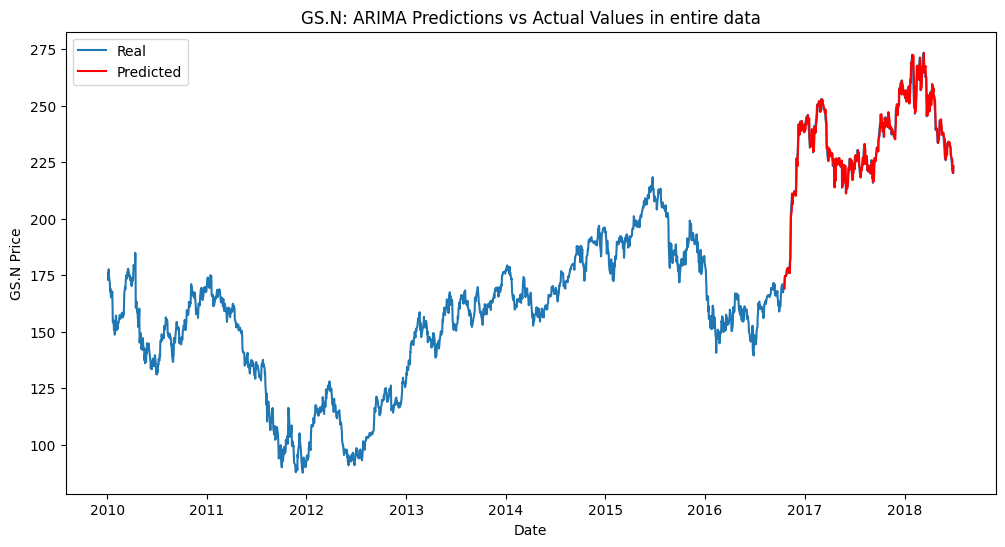

In [ ]:
# Compare GS.N entire prices with predictions
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(data['GS.N'], label='Real')
plt.plot(data['GS.N'].iloc[-sizeG:,].index, pre_GS, color='red', label='Predicted')
plt.title('GS.N: ARIMA Predictions vs Actual Values in entire data')
plt.xlabel('Date')
plt.ylabel('GS.N Price')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluation(test_y, pre_y):
    mse = mean_squared_error(test_y, pre_y)
    mae = mean_absolute_error(test_y, pre_y)
    mpe = np.mean((test_y - pre_y) / test_y) * 100
    mape = np.mean(np.abs((test_y - pre_y) / test_y)) * 100
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Percentage Error (MPE): {mpe}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")

In [33]:
#calculate evaluation metrics
for stock in selected:
    print(f'{stock}:')
    stock_values = testing_data[stock][stock]
    stock_predictions = testing_data[stock][stock + '_pred']
    evaluation(stock_values, stock_predictions)

AAPL.O:
Mean Squared Error (MSE): 3.8000410046728987
Mean Absolute Error (MAE): 1.3446962616822435
Mean Percentage Error (MPE): 0.0984467243440027
Mean Absolute Percentage Error (MAPE): 0.8625943568051467
MSFT.O:
Mean Squared Error (MSE): 1.0230139442735136
Mean Absolute Error (MAE): 0.6626326274681221
Mean Percentage Error (MPE): 0.12119638802040601
Mean Absolute Percentage Error (MAPE): 0.8317103665899541
INTC.O:
Mean Squared Error (MSE): 0.47937458893862156
Mean Absolute Error (MAE): 0.4466975824458839
Mean Percentage Error (MPE): 0.056468898291415374
Mean Absolute Percentage Error (MAPE): 1.0269043893896244
AMZN.O:
Mean Squared Error (MSE): 326.4015132009345
Mean Absolute Error (MAE): 11.88591121495327
Mean Percentage Error (MPE): 0.1609583346028755
Mean Absolute Percentage Error (MAPE): 1.0412441410335052
GS.N:
Mean Squared Error (MSE): 10.729770856742949
Mean Absolute Error (MAE): 2.424895375694672
Mean Percentage Error (MPE): 0.05199053648933862
Mean Absolute Percentage Error (M

In [142]:
# Returns without any tweaks
comparison_table = pd.DataFrame()
for stock in selected:
    stock_values = testing_data[stock][stock]
    stock_returns = testing_data[stock]['Returns']
    stock_predictions = testing_data[stock][stock + '_pred']
    signals_1 = generate_signals(stock_predictions, stock_values, 0)
    returns_1 = signals_1 * stock_returns
    signals_2 = generate_signals(stock_predictions, stock_predictions, 0)
    returns_2 = signals_2 * stock_returns
    returns_without_tweaks = max(np.exp(returns_1.sum()), np.exp(returns_2.sum()))
    returns_using_benchmark = np.exp(stock_returns.sum())
    comparison_table[stock] = [returns_without_tweaks, returns_using_benchmark]
comparison_table.index = ['Returns without any tweaks', 'Returns using benchmark']
comparison_table.T

/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/394841157.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_price = true_price[i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/394841157.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_price = prices[i]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/394841157.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


,Returns without any tweaks,Returns using benchmark
AAPL.O,1.379305,1.575807
MSFT.O,0.882503,1.710198
INTC.O,2.046265,1.316821
AMZN.O,2.097086,2.078885
GS.N,0.911642,1.277704


In [141]:
from collections import defaultdict
comparison_table = pd.DataFrame()
final_signals = defaultdict(list)
for stock in selected:
    stock_predictions = testing_data[stock][stock + '_pred']
    stock_values = testing_data[stock][stock]
    max_return = -np.inf
    best_low = None
    best_high = None
    best_window = None
    best_pct_within = None
    best_signals = None
    for window in range(5, 30, 2):
        stock_rsi = calculate_rsi(stock_predictions, window)
        macd_line, signal_line, histogram = calculate_macd(stock_predictions)
        stock_macd = macd_line - signal_line
        for low in range(25, 40, 2):
            for high in range(60, 65, 1):
                for pct_within in np.linspace(0.0, 0.01, 100):
                    rsi_signals = rsi_trading_strategy(stock_rsi, low, high)
                    rsi_signals = np.where(rsi_signals > 0, 1, -1)
                    macd_signals = macd_trading_strategy(macd_line, signal_line)
                    macd_signals = np.where(macd_signals > 0, 1, -1)
                    other_signals_1 = generate_signals(stock_predictions.values, stock_predictions.values, pct_within)
                    other_signals_2 = generate_signals(stock_predictions.values, stock_values.values, pct_within)

                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use the majority vote to determine the final signal
                    signals = rsi_signals + macd_signals + other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Use a combination of the rsi and macd signals to determine the final signal
                    signals = np.where((stock_rsi < low) & (stock_macd > 0), 1,
                                np.where((stock_rsi > high) & (stock_macd < 0), -1, 0))
                    for i in range(1, len(testing_data)):
                        if signals[i] == 0:
                            signals[i] = signals[i - 1]
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
                    
                    # Only other_signals_1
                    signals = other_signals_1
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    # Only rsi_signals
                    signals = rsi_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    # Only macd_signals
                    signals = macd_signals
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals

                    # Only other_signals_2
                    signals = other_signals_2
                    signals = np.where(signals > 0, 1, -1)
                    returns = signals * testing_data[stock]['Returns']
                    if np.exp(returns.sum()) > max_return:
                        max_return = np.exp(returns.sum())
                        best_low = low
                        best_high = high
                        best_window = window
                        best_pct_within = pct_within
                        best_signals = signals
    comparison_table[stock] = [best_low, best_high, best_window, best_pct_within, max_return, np.exp(testing_data[stock]['Returns'].sum())]
    final_signals[stock] = best_signals
comparison_table.index = ['Best Low', 'Best High', 'Best Window', 'Best Pct Within', 'Returns', 'Returns using benchmark']
comparison_table.T

,Best Low,Best High,Best Window,Best Pct Within,Returns,Returns using benchmark
AAPL.O,25.0,60.0,5.0,0.006364,2.370962,1.575807
MSFT.O,25.0,60.0,5.0,0.001212,2.218228,1.710198
INTC.O,25.0,60.0,5.0,0.000000,2.046265,1.316821
AMZN.O,25.0,60.0,5.0,0.000000,2.097086,2.078885
GS.N,25.0,60.0,5.0,0.000707,1.609137,1.277704


In [185]:
# Ideal Signals
ideal_signals = {}
for stock in selected:
    stock_returns = testing_data[stock]['Returns']
    true_signals = np.sign(stock_returns)
    ideal_signals[stock] = true_signals

In [203]:
# Precision, Recall, F1 Score
comparison_table = pd.DataFrame()
comparison_table_benchmark = pd.DataFrame()
from sklearn.metrics import precision_recall_fscore_support
for stock in selected:
    # Drop NaN values
    ideal_signals[stock] = ideal_signals[stock].dropna()
    final_signals[stock] = final_signals[stock][:len(ideal_signals[stock])]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], final_signals[stock], average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != final_signals[stock])
    comparison_table[stock] = [precision, recall, f1, num_of_false_predictions]
    precision, recall, f1, _ = precision_recall_fscore_support(ideal_signals[stock], np.ones(len(ideal_signals[stock])), average='weighted')
    num_of_false_predictions = np.sum(ideal_signals[stock] != np.ones(len(ideal_signals[stock])))
    comparison_table_benchmark[stock] = [precision, recall, f1, num_of_false_predictions]

comparison_table.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']
comparison_table_benchmark.index = ['Precision', 'Recall', 'F1 Score', 'Number of False Predictions']

/Users/Pratham/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Pratham/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/Pratham/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [204]:
# Using strategy
comparison_table.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.542136,0.548009,0.537756,193.0
MSFT.O,0.505319,0.533958,0.427934,199.0
INTC.O,0.479709,0.477752,0.475504,223.0
AMZN.O,0.430614,0.564403,0.414737,186.0
GS.N,0.532655,0.533958,0.533299,199.0


In [205]:
# Using benchmark
comparison_table_benchmark.T

,Precision,Recall,F1 Score,Number of False Predictions
AAPL.O,0.275195,0.524590,0.361008,203.0
MSFT.O,0.285111,0.533958,0.371732,199.0
INTC.O,0.287617,0.536300,0.374429,198.0
AMZN.O,0.323860,0.569087,0.412800,184.0
GS.N,0.255889,0.505855,0.339859,211.0


In [211]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrices = {}
for stock in selected:
    # Replace 0s in final_signals with previous day's signal
    for i in range(1, len(ideal_signals[stock])):
        if ideal_signals[stock][i] == 0:
            ideal_signals[stock][i] = final_signals[stock][i - 1]
    confusion_matrices[stock] = confusion_matrix(ideal_signals[stock], final_signals[stock])
for stock, matrix in confusion_matrices.items():
    print(f'{stock} Confusion Matrix:')
    print(matrix)

AAPL.O Confusion Matrix:
[[ 82 120]
 [ 71 154]]
MSFT.O Confusion Matrix:
[[ 17 176]
 [ 16 218]]
INTC.O Confusion Matrix:
[[104  93]
 [127 103]]
AMZN.O Confusion Matrix:
[[  1 183]
 [  3 240]]
GS.N Confusion Matrix:
[[111 100]
 [ 98 118]]


/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/4092940030.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ideal_signals[stock][i] == 0:
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/4092940030.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ideal_signals[stock][i] = final_signals[stock][i - 1]
/var/folders/tk/v8ycgytd24x2z6t8xl8yvqlh0000gn/T/ipykernel_47319/4092940030.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a v

In [217]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.7 MB/s eta 0:00:0010.4 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


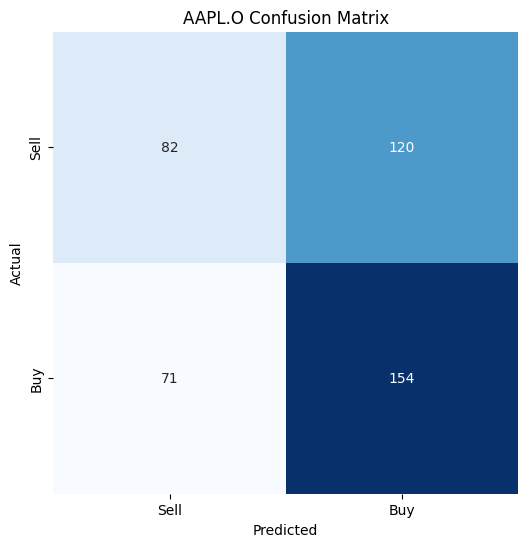

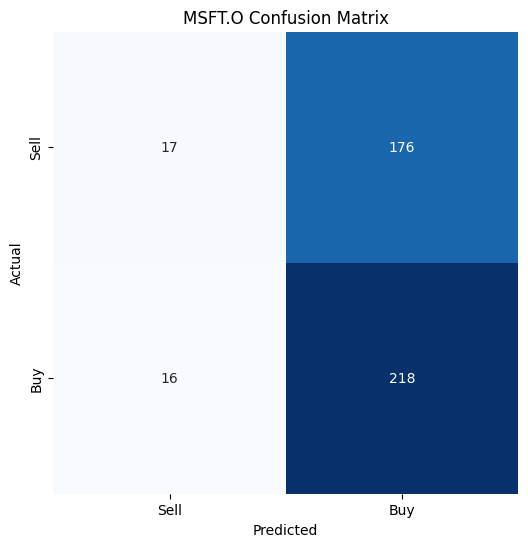

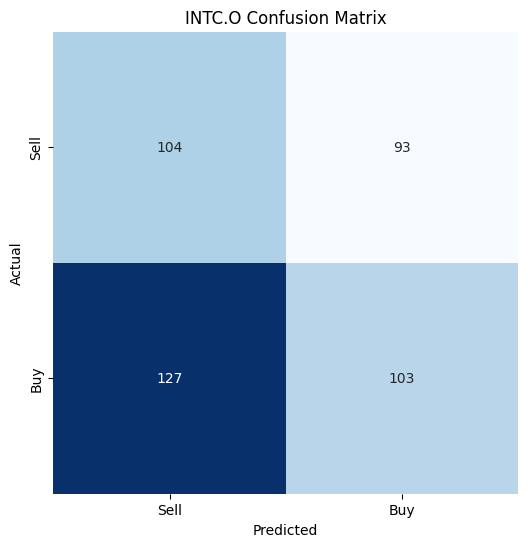

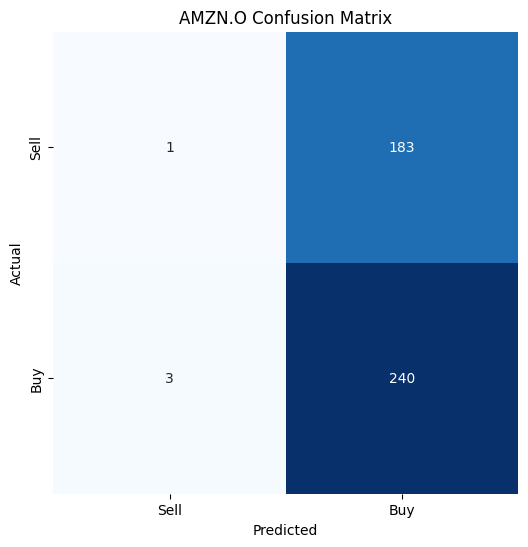

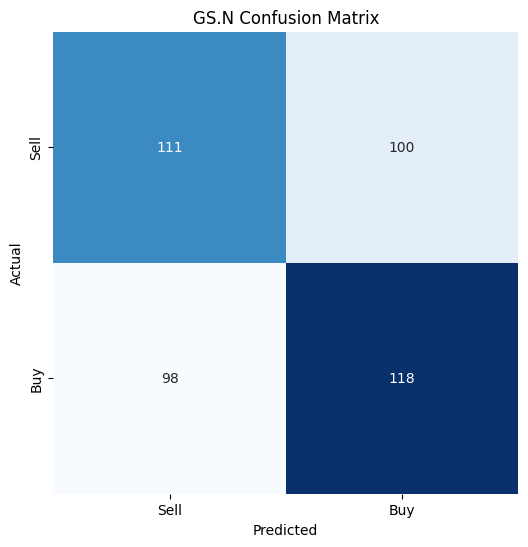

In [229]:
# Convert the confusion matrices into heatmaps in the same figure
import seaborn as sns
for stock, matrix in confusion_matrices.items():
    plt.figure(figsize=(6, 6), dpi=100)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Sell', 'Buy'], yticklabels=['Sell', 'Buy'])
    plt.title(f'{stock} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

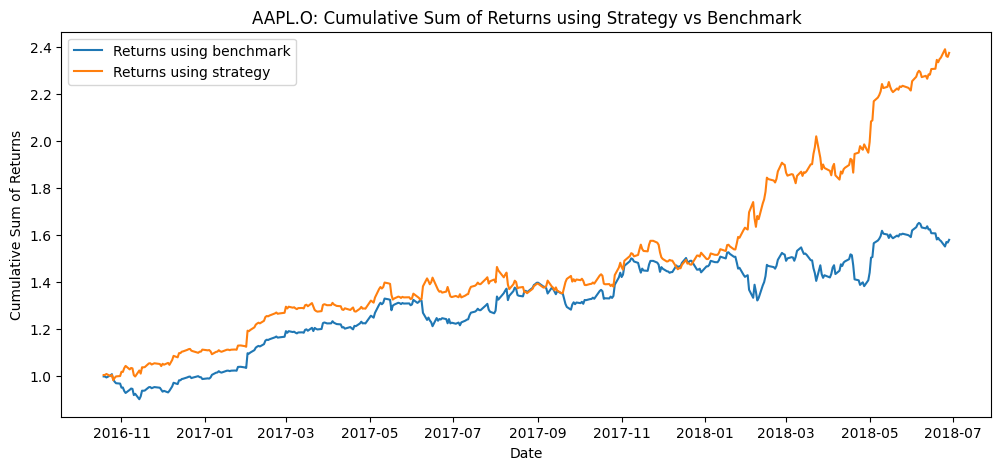

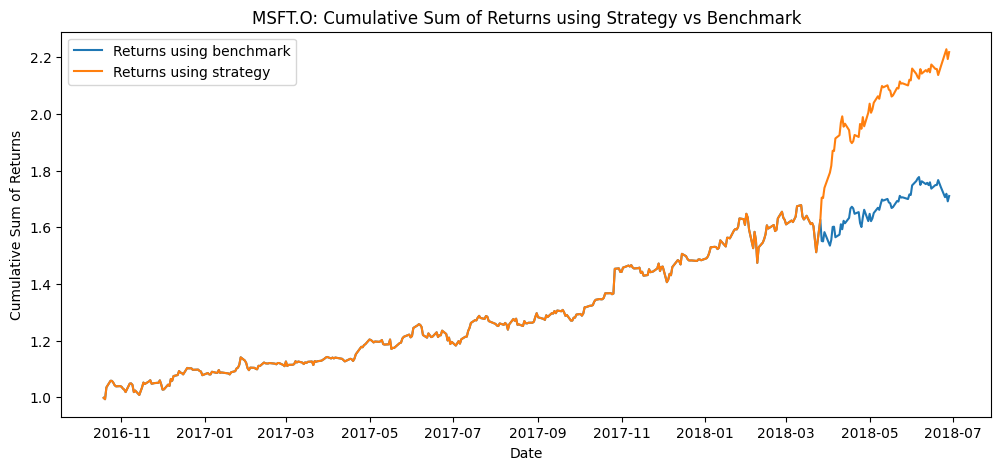

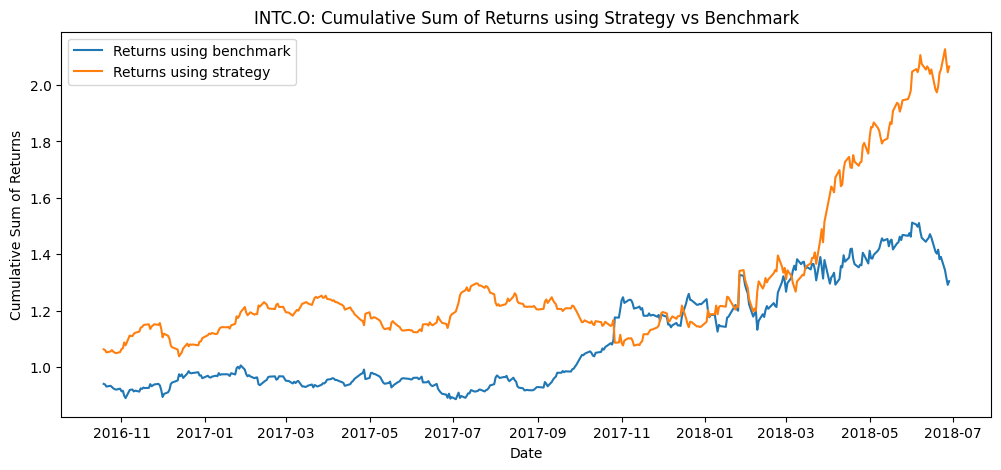

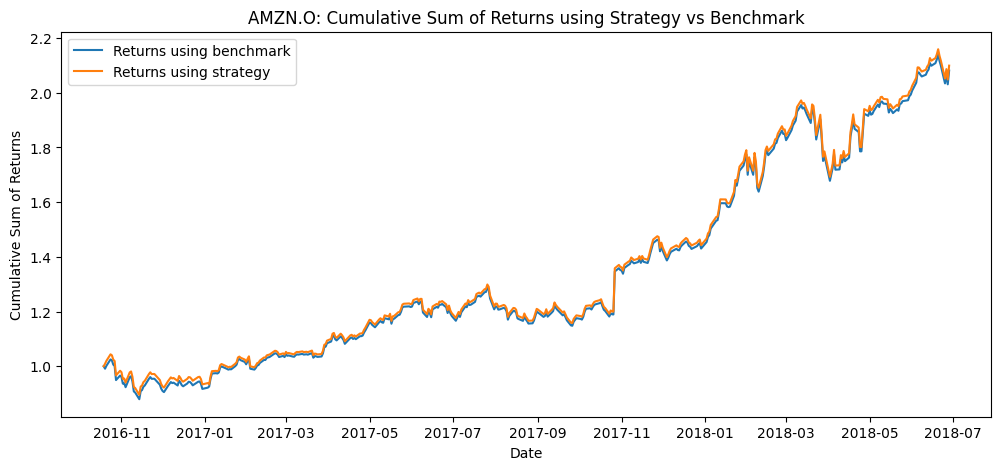

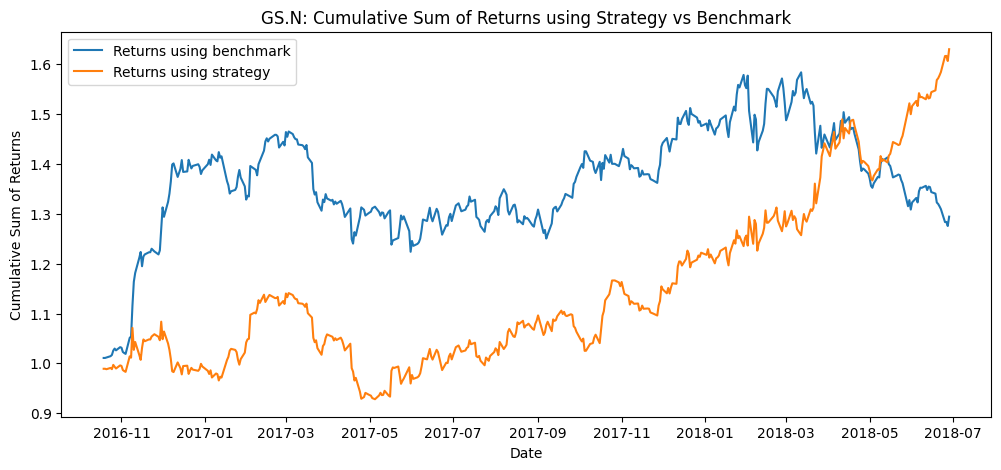

In [248]:
# Plot cumsum of returns using strategy and returns using benchmark
for stock in selected:
    stock_values = testing_data[stock][stock]
    stock_predictions = testing_data[stock][stock + '_pred']
    signals = final_signals[stock]
    stock_returns = testing_data[stock]['Returns'][:len(signals)]
    returns = signals * stock_returns
    # Plot the cumulative sum of returns and stock_returns
    plt.figure(figsize=(12, 5), dpi=100)
    plt.plot(stock_returns.index, np.exp(stock_returns.cumsum()), label='Returns using benchmark')
    plt.plot(stock_returns.index, np.exp(returns.cumsum()), label='Returns using strategy')
    plt.title(f'{stock}: Cumulative Sum of Returns using Strategy vs Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Sum of Returns')
    plt.legend()